In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = iris.target  # adding a new column 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<center> 0: setosa <br>
1: versicolor <br>
2: virginica
 

In [14]:
df[df.target==1].head() # To check where the target value is 1 (versicolor)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [17]:
# to generate a new column which includes actual name of the flower and not 0,1, or 2
# lambda -> transformation
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
import matplotlib.pyplot as plt

In [19]:
# converting these three flower_names into different datasets of their own
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [21]:
df2.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica


Text(0, 0.5, 'sepal width (cm)')

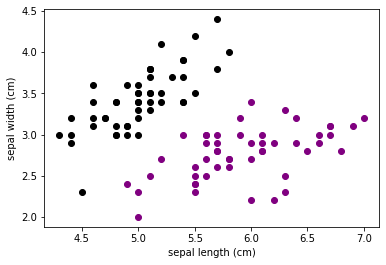

In [30]:
# DATA VISUALIZATION

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="black")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="purple")
plt.xlabel("sepal length (cm)")
plt.ylabel('sepal width (cm)')

<center> We will use SVM, because a good margin can easily be drawn here.

In [31]:
from sklearn.model_selection import train_test_split


In [34]:
X = df.drop(['target', 'flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
Y = df.target

In [36]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2)

In [37]:
len(xTrain)

120

In [38]:
len(xTest)

30

In [44]:
from sklearn.svm import SVC
model = SVC() # we can add/edit various parameters like gama, c, etc to see a change in accuracy of the model

In [45]:
model.fit(xTrain, yTrain)

SVC()

In [46]:
print("Accuracy of model:", end=" ") 
print(model.score(xTest, yTest)*100,"%")

Accuracy of model: 96.66666666666667 %
